In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from os import path
path="/content/drive/MyDrive/MachineLearningPraktikum/Praktikum5/data"

In [4]:
df = pd.read_csv(path + "/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


1. Impor Pustaka dan Membaca Data
Langkah ini mengimpor semua alat yang dibutuhkan dan memuat dataset Iris.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# Membaca file CSV
df = pd.read_csv(path + "/Iris.csv")

# Menampilkan 5 baris pertama untuk inspeksi
print("5 Baris Pertama Data:")
print(df.head())
print("\nInformasi Data:")
print(df.info())

5 Baris Pertama Data:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
mem

2. Pra-pemrosesan dan Standardisasi Data
Karena K-Means sensitif terhadap skala fitur, kita perlu menstandardisasi kolom numerik. Selain itu, kita akan memisahkan kolom Species karena K-Means adalah algoritma unsupervised yang bekerja tanpa label.

In [7]:
# Hapus kolom 'Id' (biasanya tidak diperlukan)
df = df.drop('Id', axis=1)

# Pisahkan Fitur (X) dari Label/Species (y) untuk sementara
# K-Means akan menggunakan X saja, tapi kita simpan y untuk evaluasi
X = df.drop('Species', axis=1)
y = df['Species']

# ----------------- Standardisasi Data -----------------

# Mengidentifikasi kolom numerik (semua kecuali 'Species')
numerical_cols = X.columns

# Membuat transformer untuk menstandardisasi kolom
ct = make_column_transformer(
    (StandardScaler(), numerical_cols),
    remainder='passthrough'
)

# Terapkan transformasi
X_scaled = ct.fit_transform(X)

# Konversi kembali ke DataFrame untuk kemudahan visualisasi/analisis (opsional)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

print("\nData Fitur Setelah Standardisasi (5 Baris):")
print(X_scaled_df.head())


Data Fitur Setelah Standardisasi (5 Baris):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


3. Menentukan Jumlah Cluster (K) Optimal dengan Metode Elbow
Kita akan menggunakan metode Elbow untuk menemukan nilai K yang meminimalkan Inertia (Sum of Squared Errors - SSE).

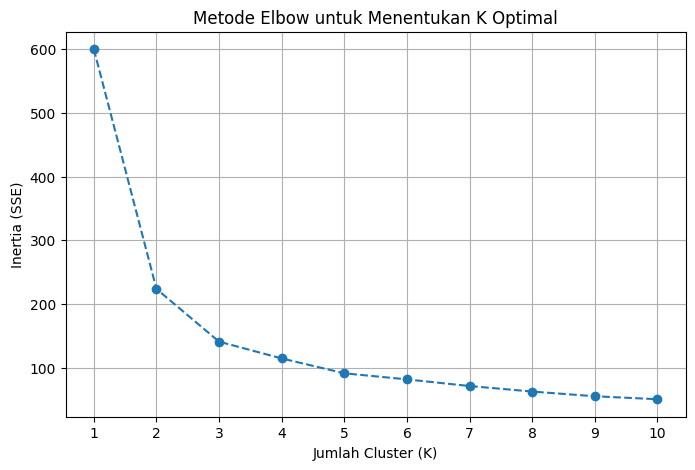

In [8]:
# List untuk menyimpan inertia (SSE)
inertia = []
K_range = range(1, 11)

# Hitung inertia untuk K=1 hingga K=10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Berdasarkan visualisasi, K optimal diasumsikan adalah 3 (karena data Iris memang memiliki 3 spesies)
K_optimal = 3

4. Membangun Model K-MeansMenginisialisasi dan melatih model K-Means dengan K optimal yang telah ditentukan (dalam kasus ini, $K=3$)

In [9]:
# Inisialisasi model K-Means dengan K_optimal
kmeans_final = KMeans(n_clusters=K_optimal, random_state=42, n_init=10)

# Melatih model dan memprediksi label cluster
df['Cluster_Label'] = kmeans_final.fit_predict(X_scaled_df)

print(f"\nModel K-Means Dilatih dengan K = {K_optimal}")
print("Jumlah data per Cluster:")
print(df['Cluster_Label'].value_counts())


Model K-Means Dilatih dengan K = 3
Jumlah data per Cluster:
Cluster_Label
0    53
1    50
2    47
Name: count, dtype: int64


5. Visualisasi Hasil Clustering
Memvisualisasikan hasil clustering pada dua dimensi menggunakan sepal_length dan petal_length (atau pasangan fitur lainnya) serta membandingkannya dengan label asli (Species)

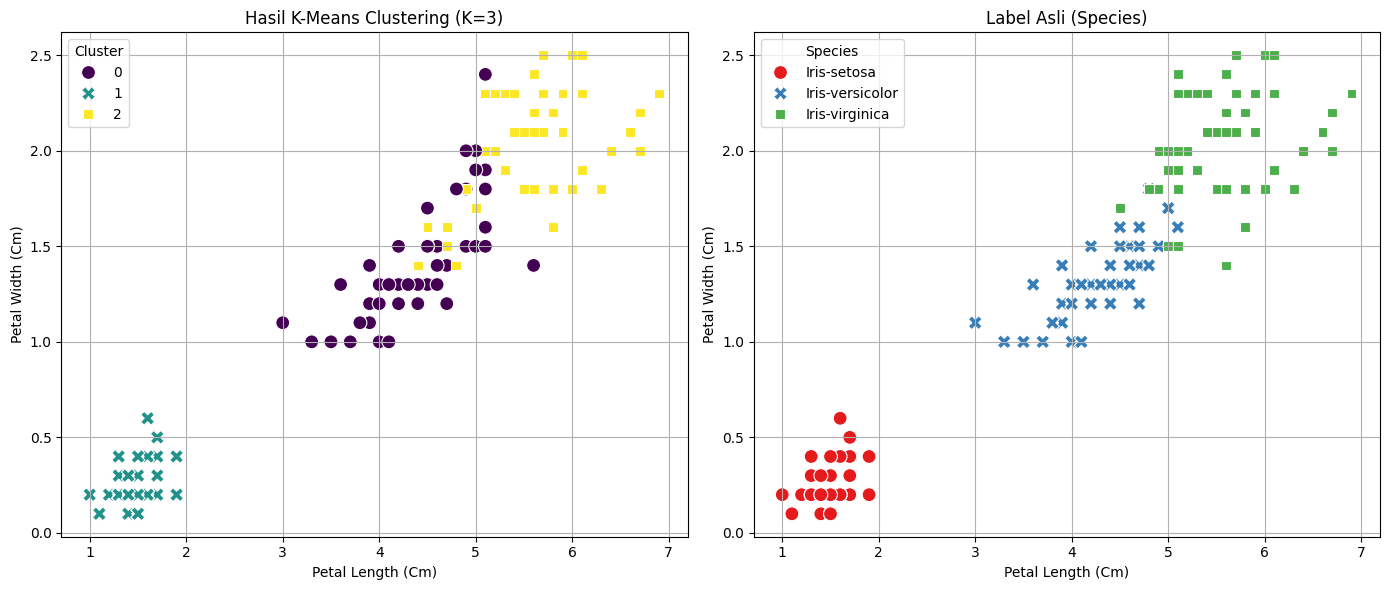

In [11]:
# ----------------- Visualisasi Hasil K-Means -----------------

# Gunakan fitur yang tidak distandardisasi untuk visualisasi yang lebih mudah dipahami
X_viz = df.drop('Cluster_Label', axis=1)

plt.figure(figsize=(14, 6))

# Plot 1: Hasil Clustering (Label K-Means)
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df['PetalLengthCm'],
    y=df['PetalWidthCm'],
    hue=df['Cluster_Label'],
    palette='viridis',
    style=df['Cluster_Label'],
    s=100
)
plt.title(f'Hasil K-Means Clustering (K={K_optimal})')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.legend(title='Cluster')
plt.grid(True)

# Plot 2: Label Asli (Species) - Untuk Perbandingan
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=df['PetalLengthCm'],
    y=df['PetalWidthCm'],
    hue=df['Species'],
    palette='Set1',
    style=df['Species'],
    s=100
)
plt.title('Label Asli (Species)')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.legend(title='Species')
plt.grid(True)

plt.tight_layout()
plt.show()

#Penjelasan

1. Persiapan dan Memuat DataLangkah awal adalah menyiapkan lingkungan kerja dengan mengimpor pustaka yang diperlukan dan memuat dataset.KodePenjelasanimport pandas as pdMengimpor Pandas untuk manipulasi dan analisis data (DataFrame).import numpy as npMengimpor NumPy untuk operasi numerik.import matplotlib.pyplot as pltMengimpor Matplotlib untuk membuat visualisasi statis.import seaborn as snsMengimpor Seaborn untuk membuat visualisasi statistik yang menarik.from sklearn.cluster import KMeansMengimpor model K-Means Clustering.from sklearn.preprocessing import StandardScalerMengimpor StandardScaler untuk menstandardisasi fitur.from sklearn.compose import make_column_transformerMengimpor tools untuk menerapkan transformasi pada kolom tertentu.df = pd.read_csv('Iris.csv')Memuat data dari file Iris.csv ke dalam DataFrame df.

2. Pra-pemrosesan Data dan StandardisasiK-Means Clustering menggunakan jarak Euclidean, yang membuatnya sangat sensitif terhadap skala fitur. Oleh karena itu, standardisasi diperlukan.KodePenjelasandf = df.drop('Id', axis=1)Menghapus kolom 'Id' karena tidak relevan untuk clustering.X = df.drop('Species', axis=1)Membuat DataFrame X yang hanya berisi fitur numerik (sepal_length, petal_length, dll.), menghilangkan kolom 'Species' karena ini adalah tugas unsupervised.y = df['Species']Menyimpan kolom Species ke variabel y untuk tujuan perbandingan dan evaluasi akhir.ct = make_column_transformer(...)Membuat objek transformer yang akan menerapkan StandardScaler pada semua kolom numerik.X_scaled = ct.fit_transform(X)Menerapkan standardisasi: setiap fitur diubah sehingga memiliki rata-rata 0 dan deviasi standar 1.X_scaled_df = pd.DataFrame(...)Mengubah hasil standardisasi kembali menjadi DataFrame untuk kemudahan penggunaan.

3. Menentukan $K$ Optimal (Metode Elbow)Metode Elbow digunakan untuk menemukan jumlah cluster ($K$) terbaik dengan mencari titik "siku" pada plot Inertia. Inertia adalah jumlah kuadrat jarak antara setiap titik data dan pusat cluster-nya (SSE/Sum of Squared Errors).KodePenjelasaninertia = []Membuat list kosong untuk menyimpan nilai Inertia.K_range = range(1, 11)Menentukan rentang $K$ yang akan diuji (dari 1 hingga 10).for k in K_range:Melakukan perulangan untuk melatih model K-Means pada setiap nilai $K$ dalam rentang.kmeans = KMeans(n_clusters=k, ...)Menginisialisasi model K-Means untuk $K$ saat ini.kmeans.fit(X_scaled_df)Melatih model K-Means.inertia.append(kmeans.inertia_)Menyimpan nilai Inertia dari model yang telah dilatih.plt.plot(K_range, inertia, ...)Membuat plot garis untuk memvisualisasikan hubungan antara $K$ dan Inertia.K_optimal = 3Berdasarkan hasil plot (titik "siku" yang menandakan penurunan Inertia mulai melambat), $K$ optimal ditetapkan 3 (sesuai dengan jumlah spesies Iris).

4. Membangun dan Melatih Model AkhirSetelah $K$ optimal ditemukan, model K-Means akhir dilatih pada seluruh data yang distandardisasi.KodePenjelasankmeans_final = KMeans(n_clusters=K_optimal, ...)Menginisialisasi model K-Means dengan $K=3$.df['Cluster_Label'] = kmeans_final.fit_predict(X_scaled_df)Melatih model (.fit) pada data terstandardisasi dan segera mendapatkan label cluster untuk setiap baris data (.predict), lalu menyimpan label tersebut ke dalam kolom baru Cluster_Label di DataFrame df.df['Cluster_Label'].value_counts()Menampilkan jumlah anggota yang termasuk dalam masing-masing cluster (0, 1, dan 2).

5. Visualisasi Hasil ClusteringLangkah terakhir adalah membandingkan hasil clustering yang didapat model dengan label asli (Species) untuk melihat seberapa baik model K-Means mengelompokkan data.KodePenjelasanplt.figure(figsize=(14, 6))Membuat kanvas visualisasi besar.plt.subplot(1, 2, 1)Membuat subplot pertama untuk menampilkan hasil Cluster_Label (hasil prediksi model K-Means).sns.scatterplot(..., hue=df['Cluster_Label'])Membuat scatter plot yang mewarnai titik data berdasarkan label cluster yang ditemukan oleh K-Means.plt.subplot(1, 2, 2)Membuat subplot kedua untuk menampilkan hasil Species (label asli/sebenarnya).sns.scatterplot(..., hue=df['Species'])Membuat scatter plot yang mewarnai titik data berdasarkan spesies aslinya.plt.show()Menampilkan kedua visualisasi tersebut untuk perbandingan.